In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [93]:
data = pd.read_csv('Analise_Sentimentos_Base.csv', low_memory=False, sep=';')

In [94]:
data.head()

,Usuario,TagNick,DataPost,Texto,Comentarios,Likes,Retweets,Texto_Traduz,Classificação_Blob,percent_pos_blob,percent_neg_blob,Azure_Sentiment,Azure_percent_pos,Azure_percent_neg,Azure_percent_neutro,Classificacao_flair,percent_pos_flar,percent_neg_flar,Percent_Media_final,Class_final
0,Wagner,vaguimjunior,2022-08-31 23:59:47+00:00,Kkkkkkk a melhor imitação do Tite que já vi kkkk,0,0,0,Lol the best imitation of Tite I've ever seen lol,neg,0.216885,0.783115,positive,0.99,0.01,0.01,POSITIVE,0.998250,0.001750,0.896454,Positivo
1,amante do dorival jr,daviof_,2022-08-31 23:58:24+00:00,Dorival chegou fervendo \nPedro tá comendo a b...,0,0,0,Dorival arrived boiling\nPedro is eating the b...,neg,0.321440,0.678560,neutral,0.24,0.20,0.56,POSITIVE,0.993862,0.006138,0.532878,Neutro
2,777 MOD,LucaVasco4,2022-08-31 23:57:55+00:00,Se o Andrey não ir pra Copa tem que demitir o ...,0,0,0,"If Andrey doesn't go to the World Cup, he has ...",pos,0.666932,0.333068,negative,0.06,0.68,0.26,NEGATIVE,0.269191,0.730809,0.214313,Negativo
3,Marcelo A. Soares,marceloas1803,2022-08-31 23:56:55+00:00,O tite é malucooooooo de nao levar o andrey pr...,0,0,0,Tite is crazy for not taking andrey to the cup...,neg,0.374421,0.625579,negative,0.03,0.94,0.03,POSITIVE,0.670824,0.329176,0.313362,Negativo
4,N.D¹⁶³🇮🇹,ffcduarte,2022-08-31 23:56:12+00:00,E o tite nem cogita convocar,0,0,0,And the tite doesn't even consider calling,pos,0.600867,0.399133,negative,0.07,0.49,0.45,NEGATIVE,0.004055,0.995945,0.111629,Negativo


In [95]:
data_Count = data.groupby('Class_final')['Percent_Media_final'].count()

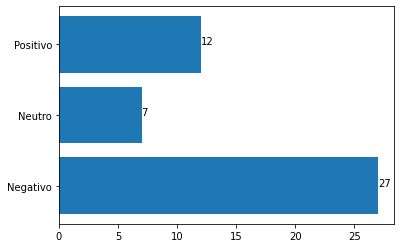

In [96]:
plt.barh(data_Count.index,data_Count)
for index, value in enumerate(data_Count): 
    plt.text(value, index, 
             str(value)) 
plt.show()

In [13]:
summary = data.dropna(subset=['Texto'], axis=0)['Texto']
# concatenar as palavras
all_summary = " ".join(s for s in summary)
# lista de stopword
stopwords = set(STOPWORDS)

In [24]:
stopwords.update(['tá','de','a','o','que','e','do','da','em','um','para','é','com','não','uma','os','no','se',
'na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','à','seu','sua','ou','ser','quando',
'muito','há','nos','já','está','eu','também','só','pelo','pela','até','isso','ela','entre','era','depois','sem',
'mesmo','aos','ter','seus','quem','nas','me','esse','eles','estão','você','tinha','foram','essa','num','nem',
'suas','meu','às','minha','têm','numa','pelos','elas','havia','seja','qual','será','nós','tenho','lhe','deles',
'essas','esses','pelas','este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu','tua','teus',
'tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles',
'aquelas','isto','aquilo','estou','está','estamos','estão','estive','esteve','estivemos','estiveram','estava',
'estávamos','estavam','estivera','estivéramos','esteja','estejamos','estejam','estivesse','estivéssemos','estivessem',
'estiver','estivermos','estiverem','hei','há','havemos','hão','houve','houvemos','houveram','houvera','houvéramos',
'haja','hajamos','hajam','houvesse','houvéssemos','houvessem','houver','houvermos','houverem','houverei','houverá',
'houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','são','era','éramos','eram','fui',
'foi','fomos','foram','fora','fôramos','seja','sejamos','sejam','fosse','fôssemos','fossem','for',
'formos','forem','serei','será','seremos','serão','seria','seríamos','seriam','tenho','tem','temos','tém','tinha',
'tínhamos','tinham','tive','teve','tivemos','tiveram','tivera','tivéramos','tenha','tenhamos','tenham','tivesse',
'tivéssemos','tivessem','tiver','tivermos','tiverem','terei','terá','teremos','terão','teria','teríamos','teriam','pra'])

In [27]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_summary)

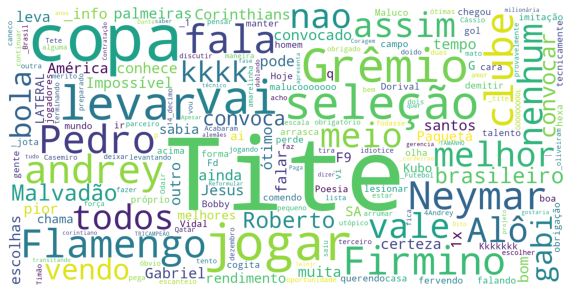

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [106]:
data_mask=data['Class_final']=="Positivo"
positivo_df = data[data_mask]
positivo_df = positivo_df.sort_values(by=['Percent_Media_final'], ascending=False)
positivo_df = positivo_df.reset_index()
positivo_df.drop('index', axis=1, inplace=True)

data_mask=data['Class_final']=="Negativo"
negativo_df = data[data_mask]
negativo_df = negativo_df.sort_values(by=['Percent_Media_final'], ascending=True)
negativo_df = negativo_df.reset_index()
negativo_df.drop('index', axis=1, inplace=True)

In [109]:
negativo_df["Class_final"].count()

27

In [103]:
df["Class_final"]

27